# Example runs of KNN

This notebook contains some runs displaying the behaviour and results from the KNN models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from knn import KNNClassifier, KNNRegressor
from sklearn import datasets
from common import find_accuracy, find_mse
np.random.seed(57)

## KNNClassifier

## Create datasets

We will first test the models on artificial datasets, so we start by making them.

In [2]:
def plot_2d_blobs(x_blobs, y_blobs=None, title=None):
    """
    Plots 2d blobs.

    Arguments:
        x_blobs (np.array): (n x 2) dimensional input array
        y_blobs (np.array): (n) dimensional target array
        title (str): If not None, creates title of plot
    """
    if y_blobs is None:  # If no labels are provided, make all labels 0.
        y_blobs = np.zeros(len(x_blobs))
    plt.scatter(x_blobs[:, 0], x_blobs[:, 1], c=y_blobs)
    if title is not None:
        plt.title(title)

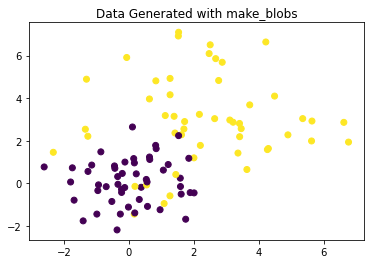

In [3]:
# Make data with sklearn's make_blobs.
n_observations = 100
n_features = 2
centers = [[0, 0], [3, 3]]
x_blobs, y_blobs = make_blobs(n_observations, n_features, centers=centers, cluster_std=[1, 2])
x_train_blobs, x_val_blobs, y_train_blobs, y_val_blobs = train_test_split(x_blobs, y_blobs, test_size=0.25)
plot_2d_blobs(x_blobs, y_blobs, title="Data Generated with make_blobs")

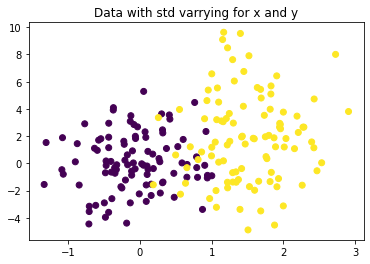

In [4]:
# Also make data with normal distribution different stds in different dimensions, to check scaling.
np.random.seed(57)
n_observations = 100
normal_data_class1 = np.random.normal((0, 0), (0.5, 2), size=(n_observations, 2))
normal_data_class2 = np.random.normal((1.5, 2.5), (0.5, 3), size=(n_observations, 2))
x_normal = np.concatenate((normal_data_class1, normal_data_class2))
y_normal = np.concatenate((np.zeros(n_observations), np.ones(n_observations)))  # Make class1 0 and class2 1
# Notice that splitting shuffles data, so its ok that it was not originally shuffled
x_train_normal, x_val_normal, y_train_normal, y_val_normal = train_test_split(x_normal, y_normal, test_size=0.25)
plot_2d_blobs(x_normal, y_normal, title="Data with std varrying for x and y")


Accuracy for first KNN model: 0.9200.


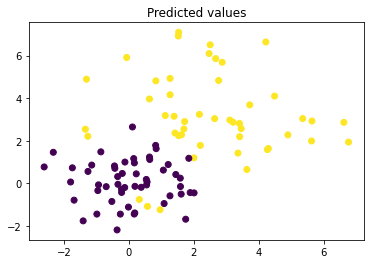

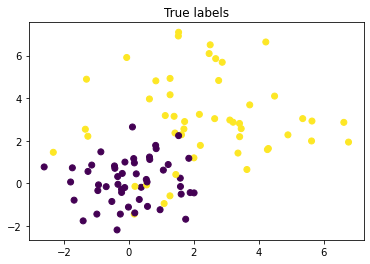

In [5]:
# Lets first try to fit a simply KNN on the blobs and plot all predictions.
cl = KNNClassifier(5)
cl.train(x_train_blobs, y_train_blobs)
preds = cl.predict(x_val_blobs)
print(f"Accuracy for first KNN model: {find_accuracy(preds, y_val_blobs):.4f}.")
# Plot prediction on all data to better see the decision boundary
preds = cl.predict(x_blobs)
plot_2d_blobs(x_blobs, preds, title="Predicted values")
plt.show()
plot_2d_blobs(x_blobs, y_blobs, title="True labels")

In [21]:
def run_knn_tests(x_train, x_val, y_train, y_val, k_values=None, scaling_values=None, 
                  model=KNNClassifier, metric_func=find_accuracy):
    """
    Runs tests on different k-values and scaling types.
    Returns the metric for every k and every scaling.

    Arguments:
        x_train (np.array): Training input data.
        x_val (np.array): Validation input data.
        y_train (np.array): Training true labels.
        y_val (np.array): Validation true labels.
        k_values (np.array): List of k-values to use.
        scaling_values (list of str): List of scaling types to use.
        model (KNN): Model to use, either "KNNClassifier" or "KNNRegressor"
        metric_func (callable): Metric function to use.
    
    Returns:
        metrics (np.array): Array of validation metrics for each k and scaling-value.
    """
    if k_values is None:
        k_values = np.arange(1, 21, 2, dtype=int)
    if scaling_values is None:
        scaling_values = ["min_max", "normal", "no_scaling"]

    metrics = np.zeros((len(scaling_values), len(k_values)))
    for i in range(len(scaling_values)):  # Loop over scaling
        scaling = scaling_values[i]
        for j in range(len(k_values)):  # Loop over differents choices for k
            k = k_values[j]
            cl = model(k, scaling=scaling)
            cl.train(x_train, y_train)
            preds = cl.predict(x_val)
            metric = metric_func(preds, y_val)
            metrics[i, j] = metric  # Store values
    return metrics, k_values, scaling_values

def plot_metrics(metrics, k_values, scaling_values, colors=None, title=None):
    """
    Plots the metrics returned from "run_knn_tests".
    """
    if colors is None:
        colors = ["red", "blue", "pink", "green"]
    for i in range(metrics.shape[0]):
        plt.plot(k_values, metrics[i], c=colors[i], label=scaling_values[i])
    if title is not None:
        plt.title(title)
    plt.xlabel("k-values")
    plt.ylabel("Validation-accuracy")
    plt.title("KNN classifier for different k's and scaling")
    plt.legend()

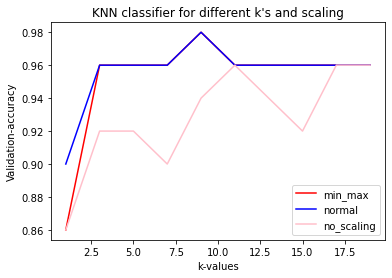

In [22]:
# Run KNNClassifier with different k's and different scaling
metrics, k_values, scaling_values = run_knn_tests(x_train_normal, x_val_normal, y_train_normal, y_val_normal)
plot_metrics(metrics, k_values, scaling_values)



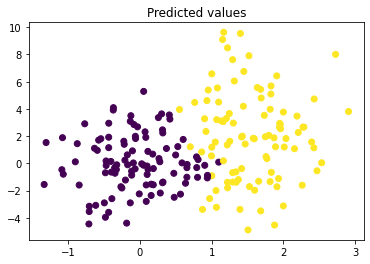

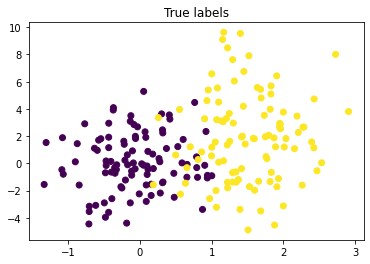

In [7]:
# Lets plot a classifiers guesses
cl = KNNClassifier(9)
cl.train(x_train_normal, y_train_normal)
preds = cl.predict(x_normal)
# Plot prediction on all data to better see the decision boundary
plot_2d_blobs(x_normal, preds, title="Predicted values")
plt.show()
plot_2d_blobs(x_normal, y_normal, title="True labels")

### Iris dataset

Let us try the KNNClassifier on the famous Iris dataset


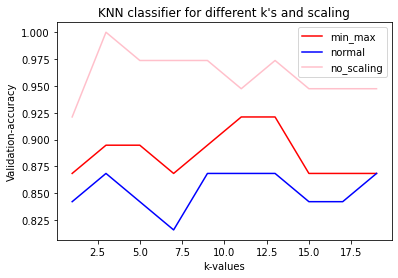

In [23]:
np.random.seed(57)
iris = datasets.load_iris()
# Choose only 3 of 4 features
x_train_iris, x_val_iris, y_train_iris, y_val_iris = train_test_split(iris["data"][:, 0:3], iris["target"], test_size=0.25)

metrics, k_values, scaling_values = run_knn_tests(x_train_iris, x_val_iris, y_train_iris, y_val_iris)
plot_metrics(metrics, k_values, scaling_values)


Here no scaling is concistently better for some reason

## KNNRegressor

Now let us do something similar for the regressor.

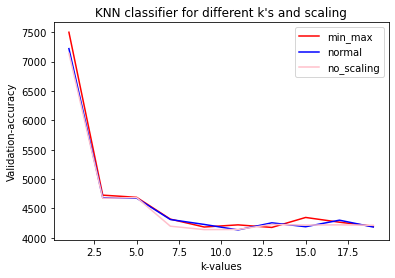

In [25]:
np.random.seed(57)
diabetes = datasets.load_diabetes()
diabetes["feature_names"]
iris = datasets.load_iris()

x_train_d, x_val_d, y_train_d, y_val_d = train_test_split(diabetes["data"][:, 0:5], diabetes["target"], test_size=0.25)

metrics, k_values, scaling_values = run_knn_tests(x_train_d, x_val_d, y_train_d, y_val_d, 
                                                  model=KNNRegressor, metric_func=find_mse)
plot_metrics(metrics, k_values, scaling_values)

Thanks for your attention :D